In [6]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import tops
import matplotlib.pyplot as plt
import pathlib
from ssd.utils import load_config

In [7]:
cfg = load_config("../configs/voc_vgg.py")
logs = tops.logger.read_logs(pathlib.Path("../outputs/voc_vgg"))

NOTE! Installing ujson may make loading annotations faster.
It looks like you are currently working on the server, with a 'working directory' in: /work/snotra/haakohu
	If you struggle with NTNU home directory becoming full, we recommend you to change the output directory to: /work/snotra/haakohu
	 /work/snotra/haakohu does not sync with NTNU HOME, and is a directory only located on the server.
	 To change the output directory of SSD, set save_in_work to True in the file configs/utils.py, in the function get_output_dir.
Saving SSD outputs to: outputs/
Found dataset directory in: /work/datasets/mnist_object_detection/train
Found dataset directory in: /work/datasets/mnist_object_detection/val
Found dataset directory in: /work/datasets/VOCdevkit/VOC2007
Found dataset directory in: /work/datasets/VOCdevkit/VOC2012
Found dataset directory in: /work/datasets/VOCdevkit/VOC2007


FileNotFoundError: Missing log file: ../outputs/voc_vgg/logs/scalars.json

In [ ]:
# The log is formatted as a list of dictionaries
print(logs[:10])

In [ ]:
# We are saving logs to disk every 10th iteration, thus we need to filter out all entries without a loss
loss_entries = [entry for entry in logs if "loss/regression_loss" in entry]

Text(0.5, 0, 'Global step (number of batches trained on)')

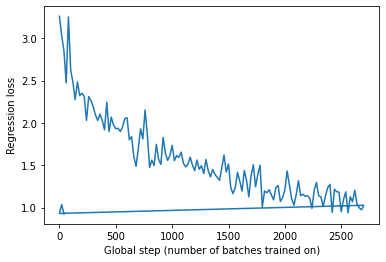

In [ ]:
plt.plot([entry["global_step"] for entry in loss_entries], [entry["loss/regression_loss"] for entry in loss_entries])
plt.ylabel("Regression loss")
plt.xlabel("Global step (number of batches trained on)")

## Some ready-made functions for your convenience
Here are some functions that reads and plots the JSON log files in `outputs/experiment_name/logs/scalars.json`. They've been made to look kind of like the tensorboard plots. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
# Using pyplot label '_nolegend_' outputs a bunch of warnings, hence:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')



plt.style.use('default') # or dark if that's your thing

def compare_metrics(metric: str, experiments, output_name: str):
    fig, ax = plt.subplots(1,1)
    for experiment in experiments:
        df = pd.read_json(experiment_information[experiment]['path_to_scalars_json'], lines=True)
        ax.set_title(metric)
        filtered_df = df[['global_step', metric]]
        filtered_df = filtered_df.dropna(subset=[metric], inplace=False)
        smoothed = filtered_df.ewm(alpha=0.6).mean()
        filtered_df.plot(x='global_step', y=metric, ylabel=metric, label='_nolegend_', color=experiment_information[experiment]['plot_color'], alpha=0.4, ax=ax)
        smoothed.plot(x='global_step', y=metric, ylabel=metric, label=experiment, color=experiment_information[experiment]['plot_color'], ax=ax)
    plt.savefig(output_name)
    
def compare_and_save_metrics(metrics_to_plot, experiments_to_compare, save_folder, file_prefix):
    for metric in metrics_to_plot:
        metric_name = metric.replace("/","-",1)
        save_path = save_folder+file_prefix+'-'+metric_name+'.png'
        if not os.path.exists(save_folder):
          # Create a new directory because it does not exist 
          os.makedirs(save_folder)
          print("Directory created in ", save_folder)
        compare_metrics(metric, experiments_to_compare, save_path)

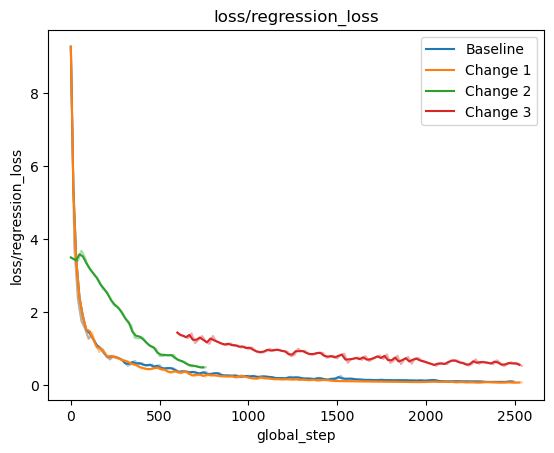

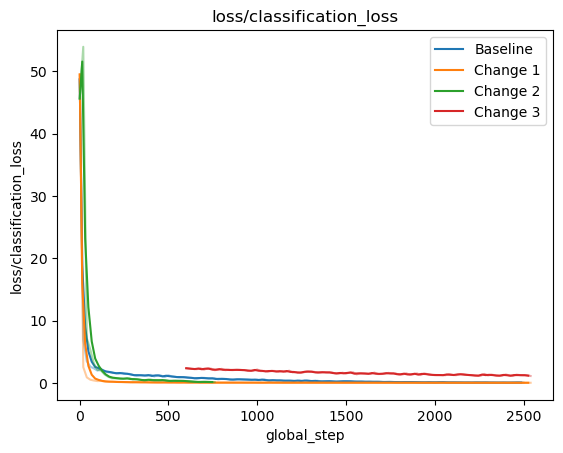

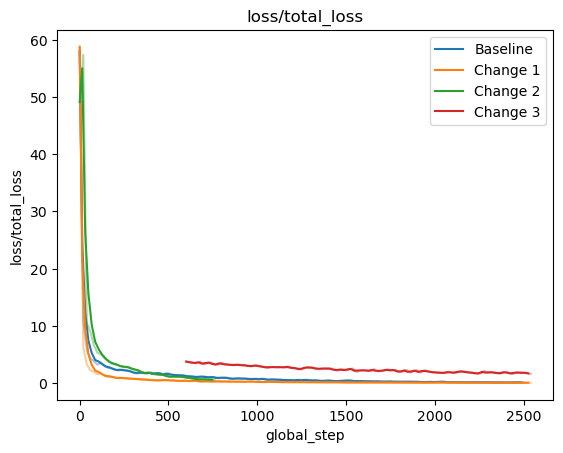

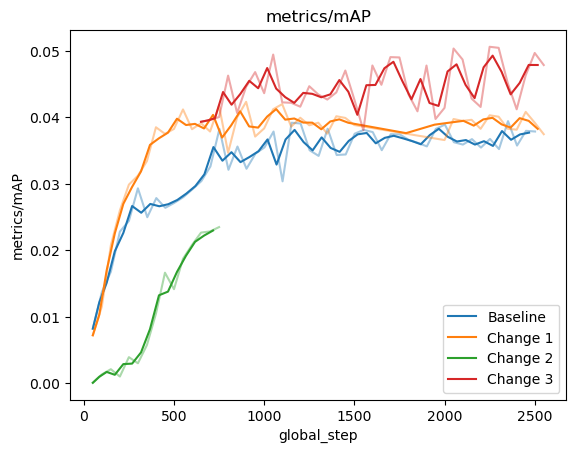

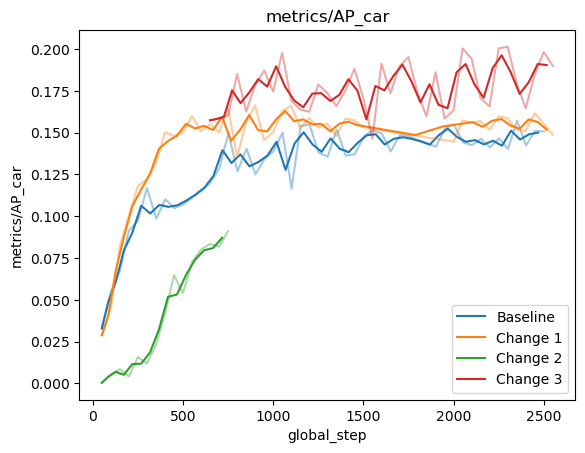

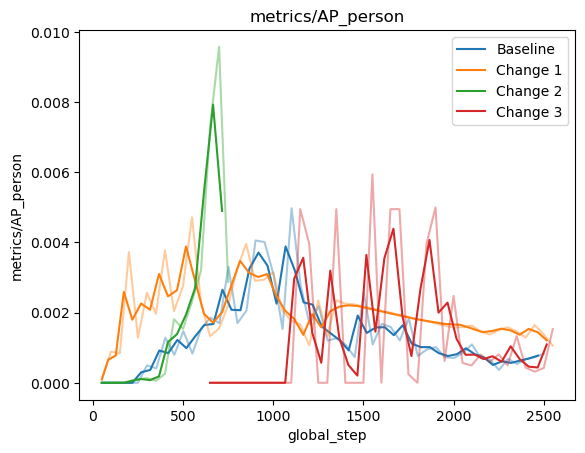

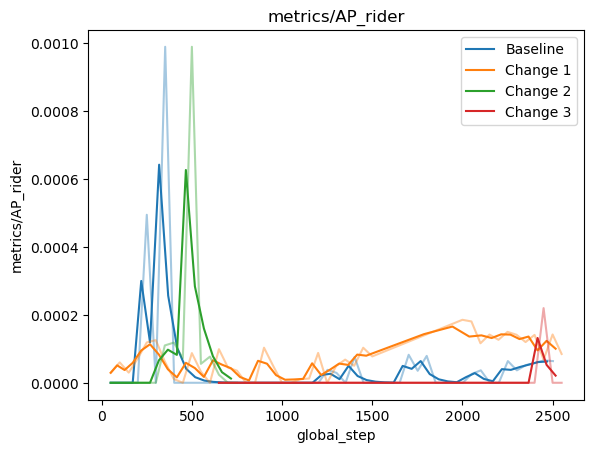

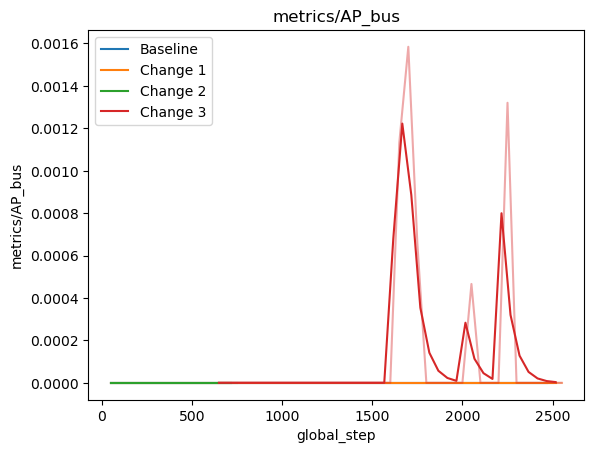

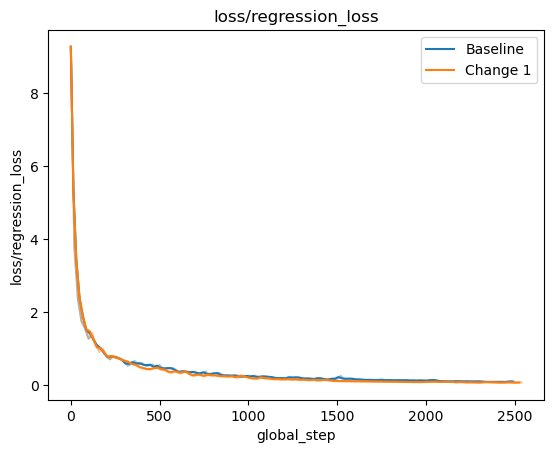

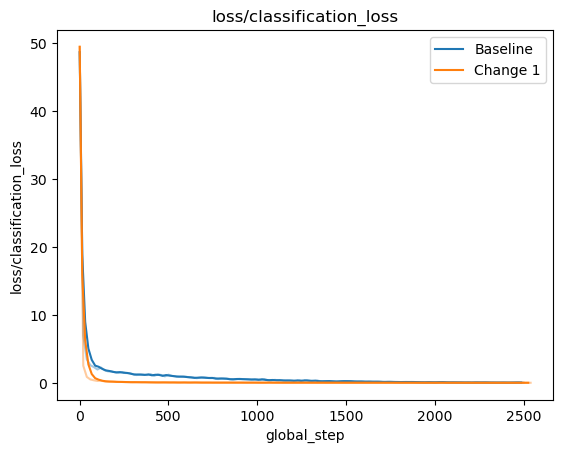

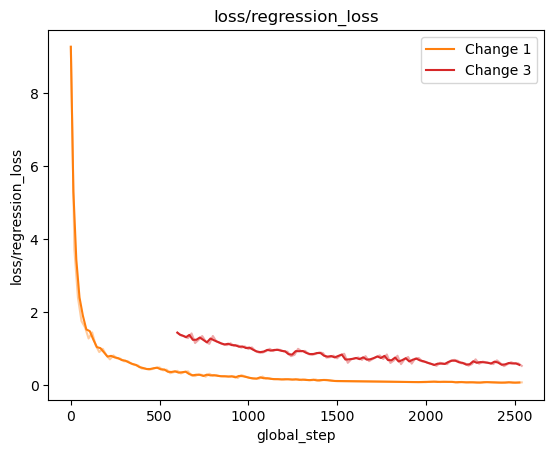

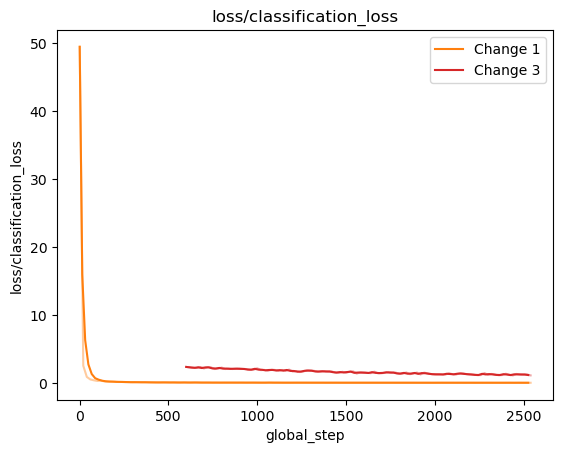

In [2]:

metrics_to_plot = ['loss/regression_loss', 
                   'loss/classification_loss', 
                   'loss/total_loss',
                   'metrics/mAP',
                   'metrics/AP_car',
                   'metrics/AP_person',
                   'metrics/AP_rider',
                   'metrics/AP_bus']

# Note that normally, path_to_scalars_json would be '../outputs/experiment_name/logs/scalars.json'
# For the example, they are in './example_jsons'

experiment_information = {
    'Baseline': {
        'path_to_scalars_json':'./example_jsons/example_1_scalars.json',
        'plot_color':'C0',
    },
    'Change 1': {
        'path_to_scalars_json':'./example_jsons/example_2_scalars.json',
        'plot_color':'C1',
    },
    'Change 2': {
        'path_to_scalars_json':'./example_jsons/example_3_scalars.json',
        'plot_color':'C2',
    },
    'Change 3': {
        'path_to_scalars_json':'./example_jsons/example_4_scalars.json',
        'plot_color':'C3',
    },
}
# Note: C0, C1, C2 etc are standard pyplot colors. They go up to C9. Other colors are also accepted :)

# Now, we can save all the desired metrics (defined in metrics_to_plot) in individual files. 
# Note that running this notebook will result in saving a lot of files in '../saved_images/example'
# The plots will be saved to the folder you specify (relative to the notebook location). For example:
compare_and_save_metrics(metrics_to_plot, experiment_information.keys(), '../saved_images/example/', 'example-all')
compare_and_save_metrics(metrics_to_plot[0:2], ['Baseline', 'Change 1'], '../saved_images/example/', 'example-baseline-change1')
compare_and_save_metrics(metrics_to_plot[0:2], ['Change 1', 'Change 3'], '../saved_images/example/', 'example-change1-change3')
